In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [9]:
df = pd.read_csv("Phishing_Email.csv")

In [10]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [11]:
df_safe_email = df[df['Email Type'] == "Safe Email"]
df_phishing_email = df[df['Email Type'] == "Phishing Email"]

In [12]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [13]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Unnamed: 0,Email Text,Email Type
31,31,NaN,Phishing Email
387,387,NaN,Phishing Email
1883,1883,NaN,Phishing Email
2049,2049,NaN,Phishing Email
2451,2451,NaN,Phishing Email
2972,2972,NaN,Phishing Email
3627,3627,NaN,Phishing Email
3806,3806,NaN,Phishing Email
5763,5763,NaN,Phishing Email
6299,6299,NaN,Phishing Email


In [14]:
df_safe_email.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [15]:
df_phishing_email.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [16]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [17]:
print(df['Email Text'].iloc[0])

re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not compl

In [18]:
df.shape

(18634, 3)

In [19]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


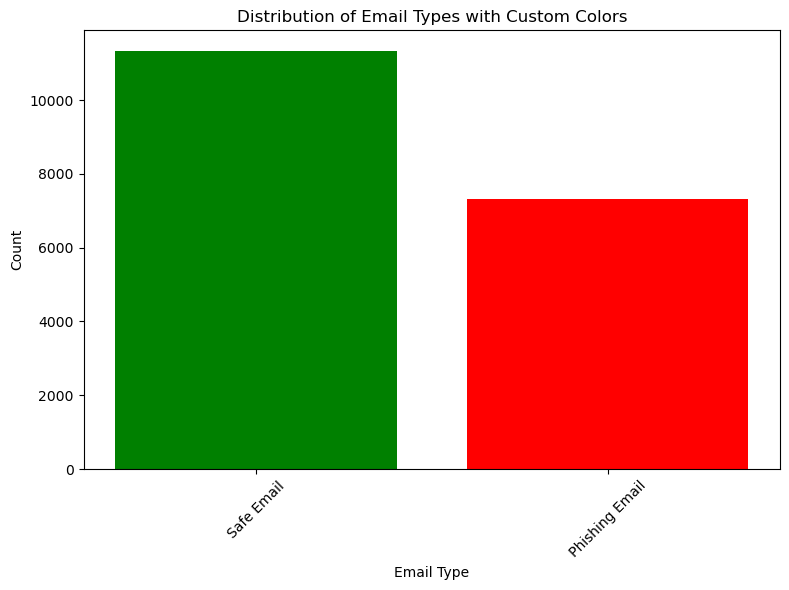

In [20]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [21]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [22]:
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [23]:
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,8512,"URL: http://www.newsisfree.com/click/-1,862211...",Safe Email
1,14797,"re : weather course julie , enron location mak...",Safe Email
2,16822,2nd workshop on interlinguas cfp second worksh...,Safe Email
3,16579,re : 3 . 404 chomsky citations i would like to...,Safe Email
4,15667,re : 5 . 1448 comparative method the ongoing d...,Safe Email


In [24]:
Data.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [25]:
X = Data["Email Text"].values
y = Data["Email Type"].values
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [27]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9268459434822243

In [29]:
new_text = ["Well well weell"]
predictions = classifier.predict(new_text)

In [30]:
predictions

array(['Phishing Email'], dtype=object)

In [31]:
from sklearn.svm import SVC

SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [32]:
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [33]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
s_ypred = SVM.predict(x_test)
accuracy_score(y_test,s_ypred )

0.4990884229717411

In [34]:
def read_data(file_path):
    data = pd.read_csv(file_path, encoding='latin-1')
    data.dropna(inplace=True)

    label_encoder = LabelEncoder()
    T_vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), max_features=5000)

    X = data['Email Text'].values
    y = data['Email Type'].values

    for i in range(len(y)):
        if y[i] == 'Phishing Email':
            y[i] = 1
        else:
            y[i] = 0

    y = label_encoder.fit_transform(y)
    return X, y


def print_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

In [35]:
data = pd.read_csv('Phishing_Email.csv')
print(data.head())
print(data['Email Type'].value_counts())

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


In [36]:
X, y = read_data('Phishing_Email.csv')
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

print(X.shape, y.shape)

(18634,) (18634,)


In [ ]:
fold = 1

for train_index, val_index in kfold.split(X):

  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3), max_features=10000)
  vectorizer.fit(X_train)

  X_train = vectorizer.transform(X_train)
  X_val = vectorizer.transform(X_val)
  
  model = XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=4, colsample_bytree=0.2, n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  print_report(y_val, y_pred, fold)
  fold += 1

Fold: 1
Accuracy Score: 0.9675342098202308
Confusion Matrix: 
 [[2113   96]
 [  25 1493]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2209
           1       0.94      0.98      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.96      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

Fold: 2
Accuracy Score: 0.9707539576066542
Confusion Matrix: 
 [[2198   81]
 [  28 1420]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2279
           1       0.95      0.98      0.96      1448

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

Fold: 3
Accuracy Score: 0.9645827743493426
Confusion Matrix: 
 [[2173   87]
 [  45 1422]]
Classification Report: 
  

In [ ]:
X_train[1]

In [ ]:
new_text = ["Hello this is definetly not a scam"]

# Transform the new text using the same vectorizer
new_text_transformed = vectorizer.transform(new_text)

# Make predictions
predictions = model.predict(new_text_transformed)

print(predictions)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
df = pd.read_csv("Phishing_Email.csv")
df.dropna(inplace=True)
X = df["Email Text"].values
y = df["Email Type"].apply(lambda x: 1 if x == "Phishing Email" else 0).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), max_features=5000)),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
with open("phishing_email_model.pkl", "wb") as file:
    pickle.dump(pipeline, file)